https://github.com/Berkmann18/facebook-friend-network
に従うことでfacebook friendsのcsv facebook.csvが生成される。
python codeはjupyterからだとうまく動作しなかったので、vs codeから推奨

In [1]:
library(ggnetwork)

Loading required package: ggplot2



In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
library(readr)

In [4]:
df = read_tsv("two_column_df.tsv")

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  Source = col_character(),
  Target = col_character()
)



In [5]:
df %>% head

X1 Source           Target           
1 0  yuko.shibata.775 atsu.hira.9      
2 1  yuko.shibata.775 enomoto.kira     
3 2  yuko.shibata.775 enomoto.niki     
4 3  yuko.shibata.775 kanekohideshi.tyo
5 4  yuko.shibata.775 nanako37         
6 5  yuko.shibata.775 nao.tsuchinaga

In [6]:
library(igraph)

Warning message:
“package ‘igraph’ was built under R version 3.6.3”

Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [7]:
run_igraph = graph.data.frame(df %>% select(Source ,Target))

## nodeに媒介中心性(betweenness centrality)をアサイン

全てのvertex pair間の最短経路のいくつが自身を通るか


In [8]:
run_bet =  betweenness(run_igraph)

In [9]:
run_igraph = set_vertex_attr(run_igraph , "bet" , value = run_bet)

## nodeにpage rankをアサイン

In [10]:
run_page_rank = page_rank(run_igraph)

In [11]:
run_igraph = set_vertex_attr(run_igraph , "page_rank" , value = run_page_rank$vector)

## nodeにcluster_edge_betweennessをアサイン

https://yokkuns.hatenadiary.org/entry/20120819/1345380060

- 全てのvertex pair間の最短経路のいくつが自身（この場合edge）を通るか、がedge betweenness
- edge betweennessが最大のedgeから取り除いていく
- 全部取り除くところまで終了すると、デンドログラム（樹形図）ができる
- 下から順番にどこかの段階で止めることでコミュニティ分解できる
- どこで止めるかはmodularity Qという尺度がある模様
- igraphのcluster_edge_betweennessではmodularityに基づいてcommunityを決定するのがデフォルト（？）

In [12]:
run_comm = cluster_edge_betweenness(run_igraph)

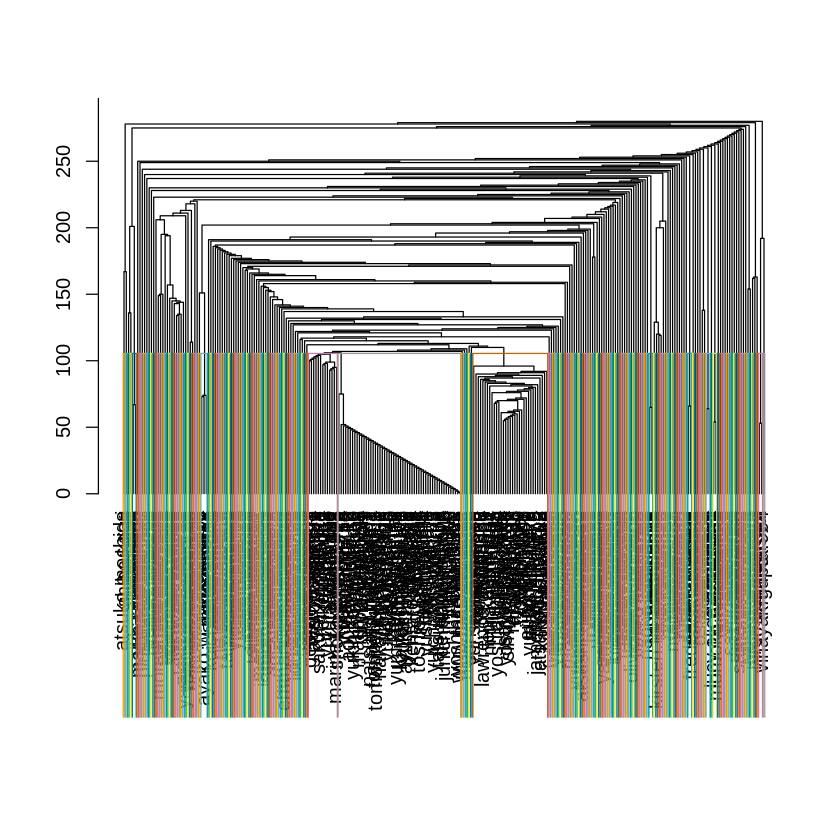

In [13]:
plot_dendrogram(run_comm)

In [14]:
class(run_comm)

[1] "communities"

In [15]:
run_mem = membership(run_comm)

In [16]:
run_igraph = set_vertex_attr(run_igraph , "comm" , value = run_mem)

### 違う設定をためしてみる（sandbox)

In [17]:
run_comm_tmp = cluster_edge_betweenness(run_igraph , modularity = F , membership = F)

In [18]:
class(run_comm_tmp)

[1] "communities"

In [19]:
run_comm_tmp

ERROR while rich displaying an object: Error in names(res) <- communities$names: 'names' attribute [281] must be the same length as the vector [0]

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime

## sigmajs (better than ggplot + ggnetwork + ggiraph)

https://github.com/jacomyal/sigma.js/wiki/Settings

http://sigmajs.john-coene.com/

In [20]:
library(sigmajs)

In [21]:
run_igraph

IGRAPH 40794ba DN-- 281 6137 -- 
+ attr: name (v/c), bet (v/n), page_rank (v/n), comm (v/n)
+ edges from 40794ba (vertex names):
 [1] yuko.shibata.775->atsu.hira.9       yuko.shibata.775->enomoto.kira     
 [3] yuko.shibata.775->enomoto.niki      yuko.shibata.775->kanekohideshi.tyo
 [5] yuko.shibata.775->nanako37          yuko.shibata.775->nao.tsuchinaga   
 [7] yuko.shibata.775->rie.sato.5439087  yuko.shibata.775->ChungSue         
 [9] yuko.shibata.775->kentaro.okuda.39  yuko.shibata.775->aoi.kawamoto.12  
[11] yuko.shibata.775->toshio.yoshizawa1 yuko.shibata.775->www.facebook.com 
[13] yuko.shibata.775->yumiko.matsuda.16 yuko.shibata.775->hiroyuki.kambe.3 
[15] yuko.shibata.775->suwahara          yuko.shibata.775->sunaga.tomoki    
+ ... omitted several edges

In [22]:
run_igraph2 = igraph::set_vertex_attr(run_igraph , "label" , value = 
                                      V(run_igraph)$name)


In [23]:
sjp = sigmajs() %>% sigmajs::sg_from_igraph(run_igraph2) %>%   
sg_layout() %>%   
sg_cluster() %>% # cluster
  sg_drag_nodes() %>% # allows user to drag nodes
  sg_neighbours()  %>% 
  sg_settings(drawLabels = FALSE, 
              drawEdgeLabels = FALSE , 
             edgeHoverExtremities = T)

In [39]:
sjp

HTML widgets cannot be represented in plain text (need html)

In [25]:
library(htmlwidgets)

In [26]:
htmlwidgets::saveWidget(sjp , file = "network.html")

## ggnetwork化

In [27]:
theme_set(theme_void())

In [28]:

options(repr.plot.width=14, repr.plot.height=10)

In [29]:
run_ggdf = fortify(run_igraph , layout = layout_(run_igraph , nicely()))

Warning message in format_fortify(model = model, nodes = nodes, weights = "none", :
“duplicated edges detected”


In [30]:
run_ggdf = fortify(run_igraph , layout = layout_(run_igraph , with_lgl()))

Warning message in format_fortify(model = model, nodes = nodes, weights = "none", :
“duplicated edges detected”


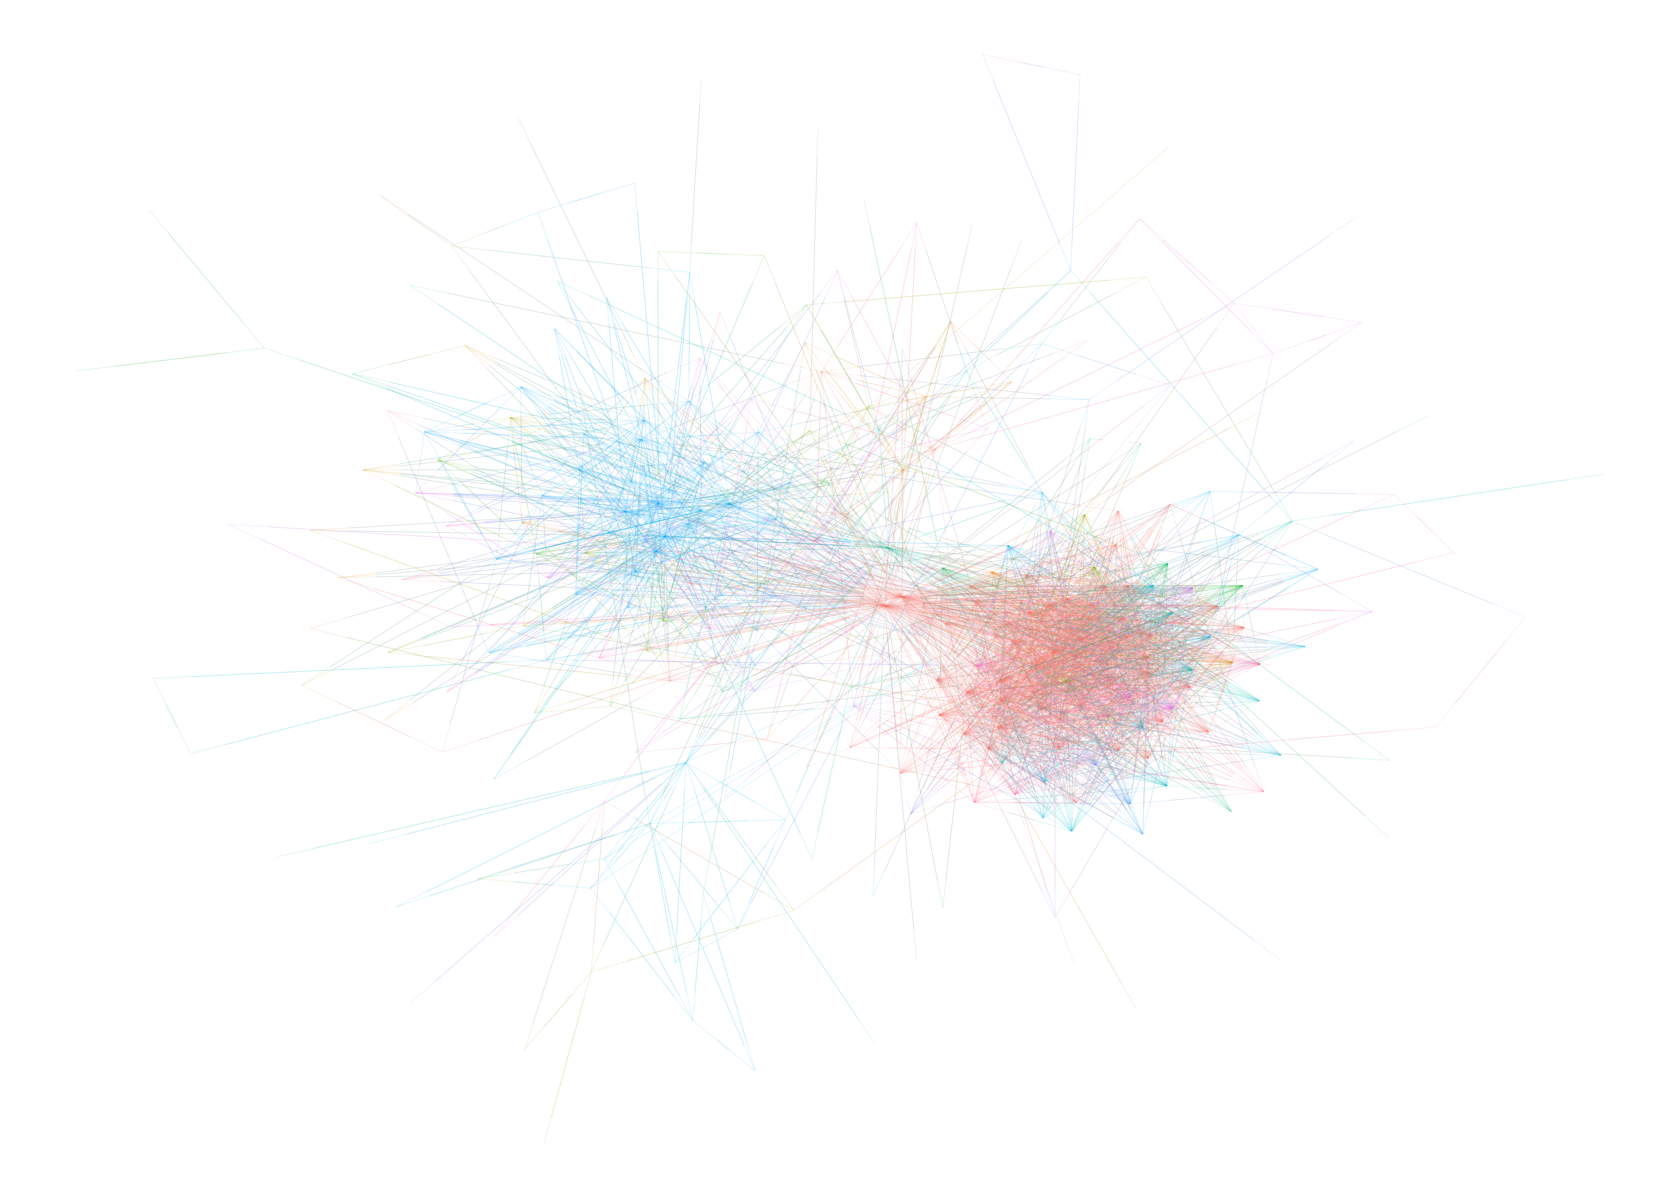

In [31]:
(g = ggplot(run_ggdf , aes(x = x , y = y , xend = xend , yend = yend , color = as.character(comm))) + 
 geom_edges(alpha = 0.1 , size = 0.3) +
 #geom_nodes() + 
 guides(color = F))

http://curleylab.psych.columbia.edu/netviz/netviz1.html#/48

In [32]:
library(ggiraph)

In [33]:
gr = g + geom_point_interactive(aes(tooltip = name, size = bet))

In [34]:
run_gi = girafe(ggobj = gr , width_svg = 10, height_svg = 10)

run_gi <- girafe_options(run_gi,
  opts_sizing(rescale = FALSE) )

run_gi

Warning message:
“package ‘gdtools’ was built under R version 3.6.3”


HTML widgets cannot be represented in plain text (need html)

In [35]:
### 媒介中心性　vs.  page rank

In [36]:
gr = ggplot(run_ggdf , aes(x = page_rank , y = bet , color = as.character(comm), tooltip = name)) + 
geom_point_interactive() + theme_minimal() + guides(color = F)

In [37]:
run_gi = girafe(ggobj = gr , width_svg = 10, height_svg = 10)

run_gi <- girafe_options(run_gi,
  opts_sizing(rescale = FALSE) )

run_gi

HTML widgets cannot be represented in plain text (need html)

In [38]:
run_ggdf %>% head

x          y         name                 bet page_rank   comm xend      
1 0.00000000 0.7100317 anurag.rajat         0   0.001611303 150  0.09847724
2 0.04711589 0.8582722 vinayak.gupta.904    0   0.001611303  47  0.11032039
3 0.05030590 0.4281596 lucy.alice.armstrong 0   0.002059246 164  0.28279089
4 0.05030590 0.4281596 lucy.alice.armstrong 0   0.002059246 164  0.06635634
6 0.07466433 0.3590272 74k35h1              0   0.001445085 164  0.28428313
7 0.07466433 0.3590272 74k35h1              0   0.001445085 164  0.05861389
  yend     
1 0.7266773
2 0.7523143
3 0.4433937
4 0.3826063
6 0.4363740
7 0.4045804